# Датасет Бейсбол
## Подготовка датасета

Обозначим классы следующими метками: BARO - 0, TROP - 1.

In [3]:
import numpy  as np
import pandas as pd

data_pd=pd.read_csv('Barotrop_formatted.csv', sep=';', decimal=',')

print(data_pd)
print(data_pd.describe())

    LONGITUD  LATITUDE  CLASS
0       59.0        17      0
1       59.5        21      0
2       60.0        12      0
3       60.5        16      0
4       61.0        13      0
5       61.0        15      0
6       61.5        17      0
7       61.5        19      0
8       62.0        14      0
9       63.0        15      1
10      63.5        19      1
11      64.0        12      1
12      64.5        16      1
13      65.0        12      1
14      65.0        15      1
15      65.0        17      1
16      65.5        16      1
17      65.5        19      1
18      65.5        21      1
19      66.0        13      1
20      66.0        14      1
21      66.0        17      1
22      66.5        17      1
23      66.5        18      1
24      66.5        21      1
25      67.0        14      1
26      67.5        18      1
27      68.0        14      0
28      68.5        18      0
29      69.0        13      0
30      69.0        15      0
31      69.5        17      0
32      69

## Разведочный анализ данных

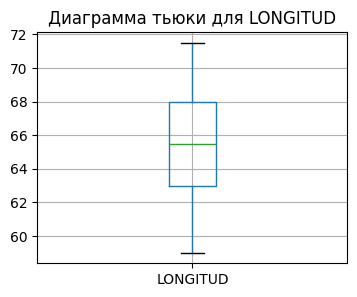

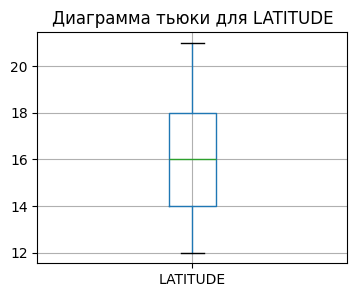

In [5]:
import matplotlib.pyplot as plt

data_columns = tuple(data_pd.columns)

for i in range(len(data_pd.iloc[0]) - 1):
    plt.figure(figsize=(4.0,3))
    plt.title(f'Диаграмма тьюки для {data_columns[i]}')
    data_pd[[data_columns[i]]].boxplot()
    plt.show()
    
plt.show()

Димаграммы Тьюки выглядят симметричными, а медиана находится ровно в середине ящика. Вполне возможно, что данные параметры распределены нормально. Также выбросы не наблюдаются, а усы не выглядят большими.

          LONGITUD  LATITUDE     CLASS
LONGITUD  1.000000  0.080631  0.011419
LATITUDE  0.080631  1.000000  0.042654
CLASS     0.011419  0.042654  1.000000


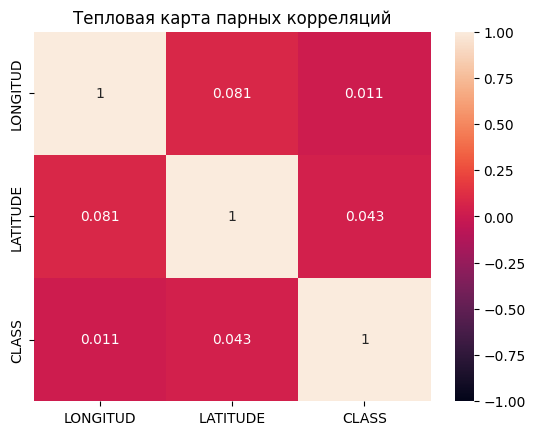

In [6]:
import seaborn as sns

corr_matr = data_pd.corr()
print(corr_matr)

sns.heatmap(corr_matr, annot= True, vmin=-1, vmax=1)
plt.title('Тепловая карта парных корреляций')
plt.show()

Судя по парным корреляциям, между всеми переменными корреляции не наблюдаются.

          LONGITUD  LATITUDE     CLASS
LONGITUD  1.000000  0.080222  0.008014
LATITUDE  0.080222  1.000000  0.041872
CLASS     0.008014  0.041872  1.000000


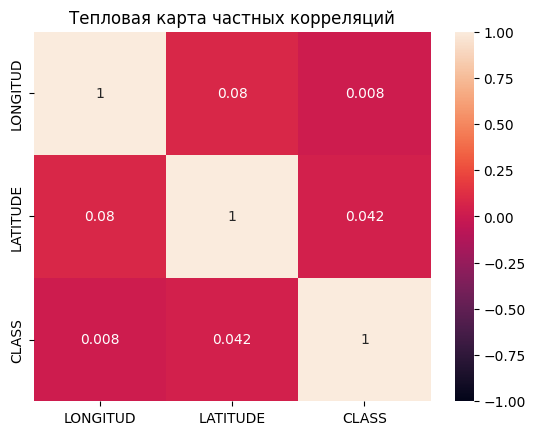

In [7]:
import pingouin

pcorr_matr = data_pd.pcorr()
print(pcorr_matr)

sns.heatmap(pcorr_matr, annot= True, vmin=-1, vmax=1)
plt.title('Тепловая карта частных корреляций')
plt.show()

In [8]:
#Количество параметров
n = len(data_pd)
k = len(data_pd.iloc[0]) - 1

def minor(A, i, j):
    a_shape = A.shape[0]
    M = np.eye(a_shape - 1)
    M[:i,:j] = A[:i,:j]
    M[:i,j:] = A[:i,j+1:]
    M[i:,:j] = A[i+1:,:j]
    M[i:,j:] = A[i+1:,j+1:]

    return M

def alg_dop(A, i, j):
    M = minor(A, i, j)
    return (-1)**(i+j) * np.linalg.det(M)

R = corr_matr.values
#Множественная корреляция y к x-ам
R_y_x = np.sqrt(1 - np.linalg.det(R)/alg_dop(R, k, k))
print(f'Коэффициент множественной корреляции Position: {R_y_x:.3f}')

Коэффициент множественной корреляции Position: 0.043


Коэффициент множественной коррреляции получился тоже малым. Это значит, что данные параметры имеют слабую линейную связь с классом.

In [9]:
import scipy.stats

kstest_res = [ scipy.stats.kstest(data_pd.iloc[:,i], 'norm') for i in range(len(data_pd.iloc[0]))]
for i in range(len(kstest_res)):
    print(f'Значение статистики для {data_columns[i]}: {kstest_res[i].statistic:.3f}, pvalue: {kstest_res[i].pvalue:.2e}')

Значение статистики для LONGITUD: 1.000, pvalue: 0.00e+00
Значение статистики для LATITUDE: 1.000, pvalue: 0.00e+00
Значение статистики для CLASS: 0.500, pvalue: 4.45e-09


Все имеющиеся параметры почти наверняка не распределены нормально.

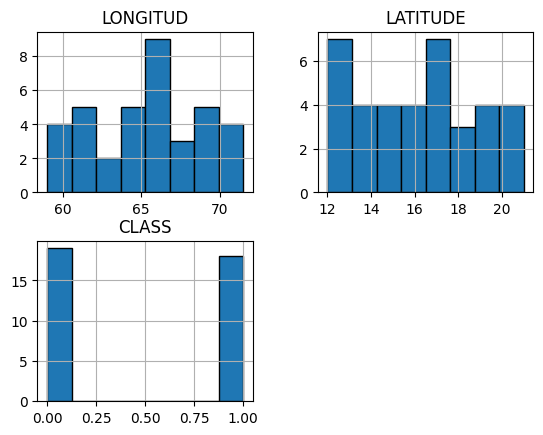

In [17]:
data_pd.iloc[:,:].hist(bins = 8, edgecolor='black')
plt.show()

Ненормальность распределений параметров видна на данных оценках распределений.

В данном датасете корреляция между параметрами не наблюдается. Это значит, что скорее всего модели основанные на линейной регрессии будут неэффективны, и строить их здесь не целесообразно.